In [14]:
'''
Preprocess the cosmology targets for the fiber assignment.
'''
from utils.common_imports import np, time, plt, fits, Table, new_colors
from utils.io import plot_radec, write_data_table

# TO-DO: def data_check() - check the data using plots and functions

In [15]:
def get_data_table_cos(data_cos):
    '''
    Get the data table for the cosmology targets.
    '''
    ng = len(data_cos)
    print(f'There are {ng} cosmology targets.')
    print(data_cos.columns)

    # create the data table
    data_table = Table()
    data_table['ID'] = np.array(['_Cos_'+str(x) for x in data_cos['object_id']])
    #FIXME: need to check the column names, is 'i_ra' and 'i_dec' correct?
    data_table['R.A.'] = np.array(data_cos['i_ra'], dtype='float64')
    data_table['Dec.'] = np.array(data_cos['i_dec'], dtype='float64')
    data_table['Exposure Time'] = np.zeros(ng, dtype='float64') + 900.0 # 900 seconds, 2*7.5 mins
    data_table['Priority'] = np.ones(ng, dtype='int32') # only one priority
    data_table['stage'] = np.zeros(ng, dtype='int32') # 0 for non-ancillary targets
    data_table['AlreadyObserved'] = np.zeros(ng, dtype='int32') # 0: False, 1: True
    data_table['PartiallyObserved'] = np.zeros(ng, dtype='int32') # 0: False, 1: True
    data_table['otime'] = np.empty(ng, dtype='U20') # time of observation in ISO8601 UTC format, e.g."2016-04-03T08:00:00Z"
    data_table['TileID'] = np.zeros(ng, dtype='int32') - 1 # default=-1
    data_table['TileIDExtraExposure'] = np.zeros(ng, dtype='int32') - 1 # default=-1
    data_table['otimeExtraExposure'] = np.empty(ng, dtype='U20')

    return data_table


# Cosmology targets

In [16]:
# -------------------------------------------------------------------- #
t0 = time.time()

# basic inputs
# TO-DO: change the ra, dec range
ra_range, dec_range = [-10, 10], [-1.5, 0.5] # a test for 3 hours (12 pointings) observation in autumn field

prefix_outfn = 'cosmology_region3_3h'
output_dir = '../data_proc/test/'

# cosmology targets for testing
with fits.open('../data_raw/test/s21a_wide_gal_select.fits', memmap=True) as hdul:
    data_cos = hdul[1].data

# make the ra in the range of [-180, 180] for autumn field
data_cos['i_ra'][data_cos['i_ra']>300] -= 360

t1 = time.time()
print(f'Time taken - read data: {t1-t0:.2f} seconds')

# -------------------------------------------------------------------- #
# mask 
if (ra_range[0] > ra_range[1]) or (dec_range[0] > dec_range[1]):
    raise ValueError('Invalid ra, dec range.')

if (ra_range!=None) and (dec_range!=None):
    msk = (data_cos['i_ra'] > ra_range[0]) & (data_cos['i_ra'] < ra_range[1]) & (data_cos['i_dec'] > dec_range[0]) & (data_cos['i_dec'] < dec_range[1])
else:
    msk = np.ones(len(data_cos), dtype=bool)

# make ra in the range of [0, 360] before saving
data_cos['i_ra'][data_cos['i_ra']<0] += 360

# get the data_table for netflow run
data_table = get_data_table_cos(data_cos)

t2 = time.time()
print(f'Time taken - create data_table: {t2-t1:.2f} seconds')

# write the data to ecsv file
write_data_table(data_table[msk], prefix=prefix_outfn, output_dir=output_dir, fmt='ecsv')

t3 = time.time()
print(f'Time taken - save data_table to ecsv file: {t3-t2:.2f} seconds')


Time taken - read data: 58.10 seconds
There are 7152462 cosmology targets.
ColDefs(
    name = 'object_id'; format = 'K'
    name = 'object_id_isnull'; format = 'L'
    name = 'parent_id'; format = 'K'
    name = 'parent_id_isnull'; format = 'L'
    name = 'tract'; format = 'J'
    name = 'tract_isnull'; format = 'L'
    name = 'patch'; format = 'J'
    name = 'patch_isnull'; format = 'L'
    name = 'i_ra'; format = 'D'
    name = 'i_ra_isnull'; format = 'L'
    name = 'i_dec'; format = 'D'
    name = 'i_dec_isnull'; format = 'L'
    name = 'i_variance_value'; format = 'E'
    name = 'i_variance_value_isnull'; format = 'L'
    name = 'i_footprintarea_value'; format = 'J'
    name = 'i_footprintarea_value_isnull'; format = 'L'
    name = 'a_g'; format = 'E'
    name = 'a_g_isnull'; format = 'L'
    name = 'a_r'; format = 'E'
    name = 'a_r_isnull'; format = 'L'
    name = 'a_i'; format = 'E'
    name = 'a_i_isnull'; format = 'L'
    name = 'a_z'; format = 'E'
    name = 'a_z_isnull'; f

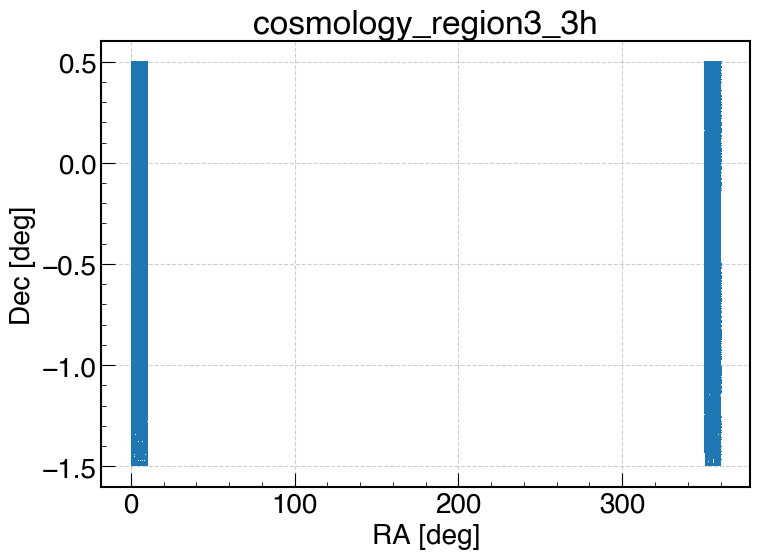

In [17]:
# plot the ra-dec distribution
plot_radec(data_table[msk], title=prefix_outfn, save_fig=True, output_dir="../output/figures/test/")